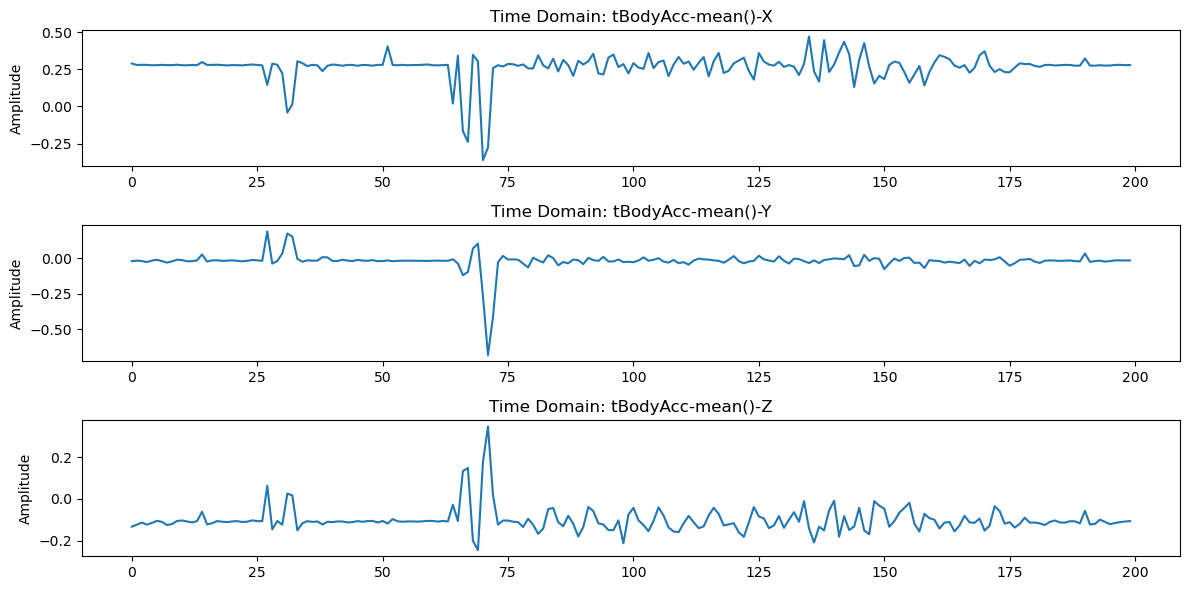

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('X_train.csv')

# 假设 df 是包含所有特征的DataFrame
time_features = df[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y',
                    'tBodyAcc-mean()-Z']]

labels = pd.read_csv('y_train.csv')
# 假设 labels 是包含标签的DataFrame
# 这里我们假设标签是一个一维数组，包含每个样本的标签
labels = labels.values.flatten()
# 绘制时域特征
plt.figure(figsize=(12, 6))
for i, col in enumerate(time_features.columns):
    plt.subplot(3, 1, i+1)
    plt.plot(time_features[col].values[:200])  # 展示前200个样本窗口
    plt.title(f'Time Domain: {col}')
    plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

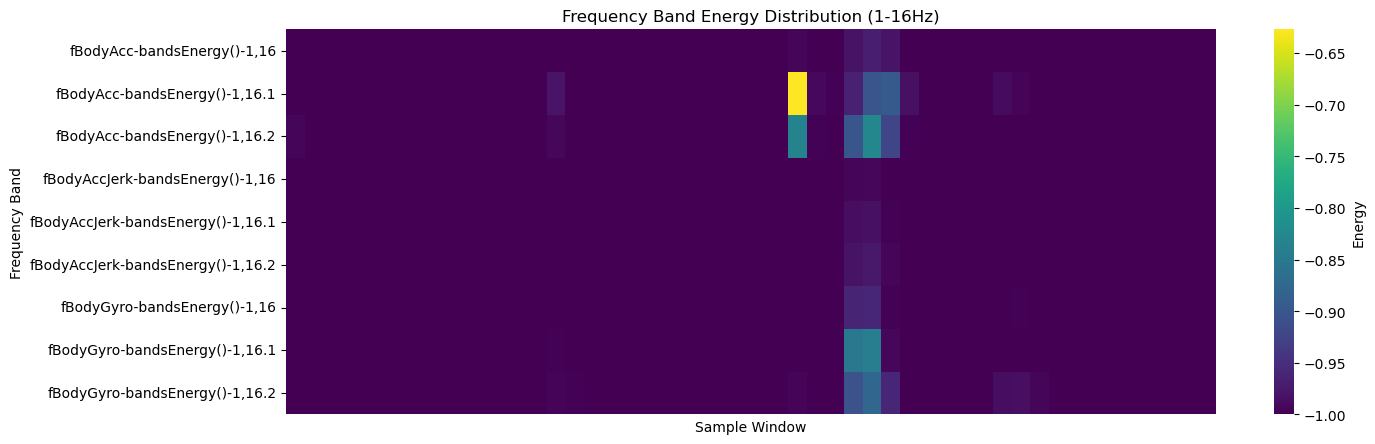

In [6]:
import seaborn as sns
# 选择特定频段能量特征（示例为1-16Hz频段）
freq_bands = df.filter(regex='bandsEnergy\\(\\)-1,16')

plt.figure(figsize=(15, 5))
sns.heatmap(freq_bands.iloc[:50].T,  # 展示前50个样本的频段能量
            cmap='viridis',
            cbar_kws={'label': 'Energy'})
plt.title('Frequency Band Energy Distribution (1-16Hz)')
plt.xlabel('Sample Window')
plt.ylabel('Frequency Band')
plt.xticks([])
plt.show()

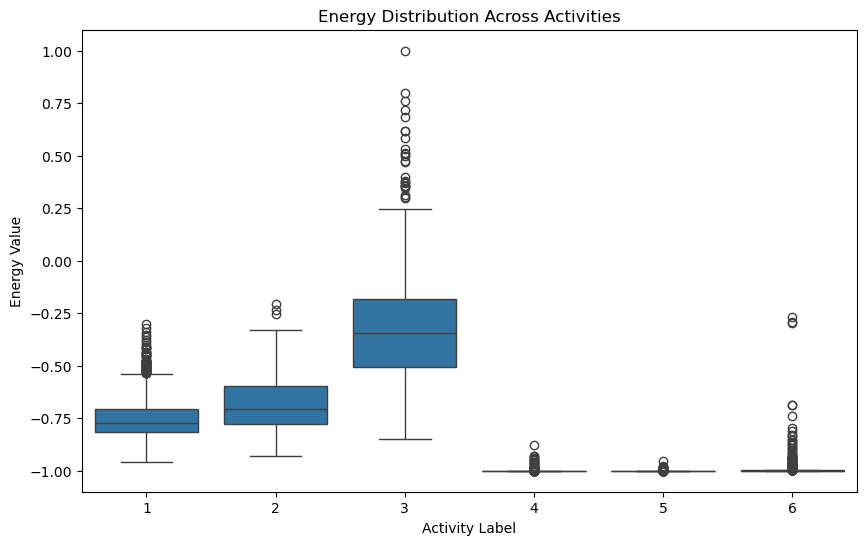

In [7]:
# 假设 labels 是动作标签（如0: 行走, 1: 站立）
energy_features = df.loc[:, [
    'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z']]
energy_features['label'] = labels

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='tBodyAcc-energy()-X', data=energy_features)
plt.title('Energy Distribution Across Activities')
plt.xlabel('Activity Label')
plt.ylabel('Energy Value')
plt.show()

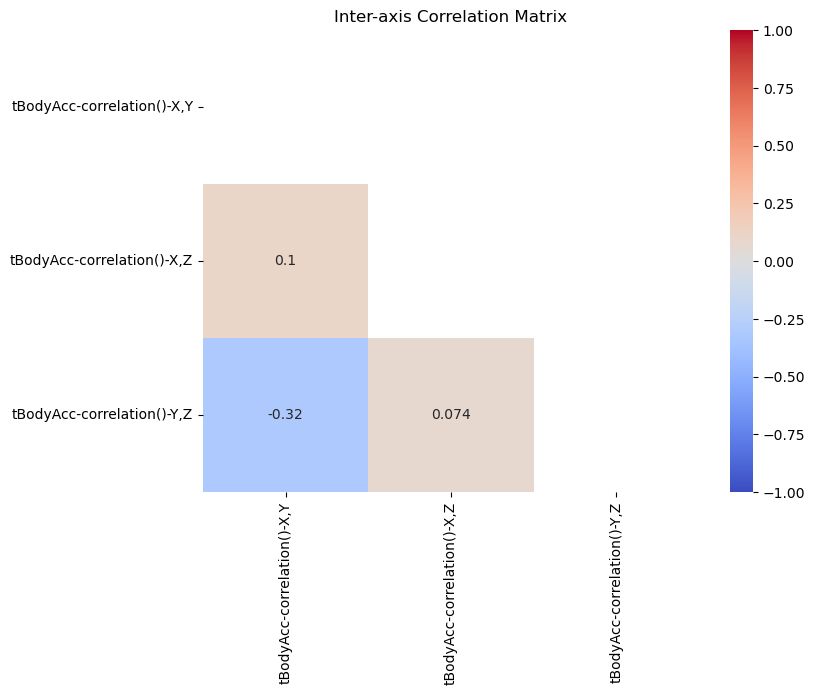

In [10]:
# 选择加速度计三轴相关性特征
corr_features = df[['tBodyAcc-correlation()-X,Y',
                   'tBodyAcc-correlation()-X,Z',
                    'tBodyAcc-correlation()-Y,Z']]

plt.figure(figsize=(8, 6))
sns.heatmap(corr_features.corr(),
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=np.triu(np.ones_like(corr_features.corr())))
plt.title('Inter-axis Correlation Matrix')
plt.show()

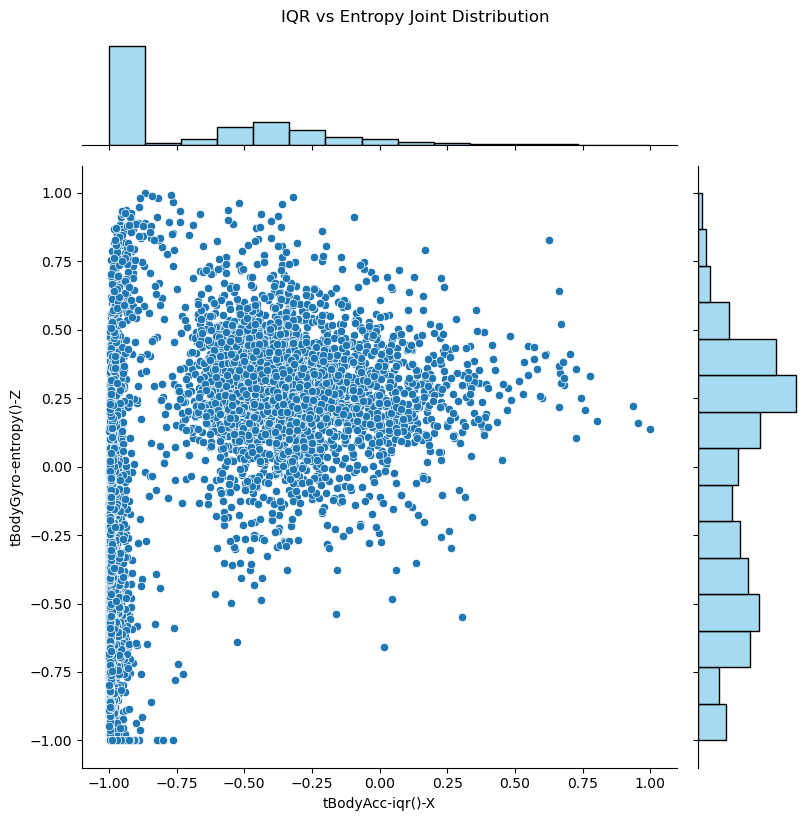

In [11]:
sns.jointplot(x='tBodyAcc-iqr()-X',
              y='tBodyGyro-entropy()-Z',
              data=df,
              kind='scatter',
              marginal_kws={'bins': 15, 'color': 'skyblue'},
              height=8)
plt.suptitle('IQR vs Entropy Joint Distribution', y=1.02)
plt.show()